In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

data = pd.read_csv('C:\\Users\\avinash\headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [10]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer = 0
denom = 0

for i in range(m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i] - mean_x)**2
    
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
    
print(b1,b0)

0.26342933948939945 325.57342104944223


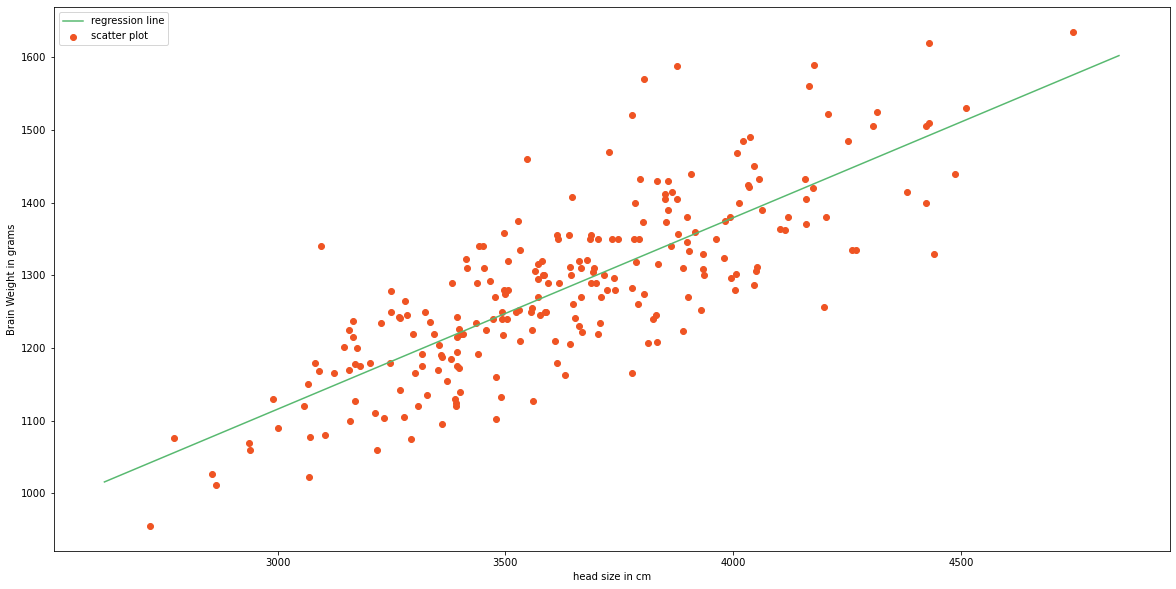

In [20]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values  x and y
x = np.linspace(min_x , max_x , 1000) 
y = b0 + b1 * x

#plotting line
plt.plot(x , y , color = '#58b970' , label = 'regression line') 
#plotting scatter points
plt.scatter(X , Y , c = '#ef5423' , label = 'scatter plot')

plt.xlabel('head size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [21]:
ss_t = 0
ss_r = 0
for i in  range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2

r2 = 1- (ss_r/ss_t)
print(r2)

0.6393117199570003


In [28]:
#using sklearn library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn
X  = X.reshape((m,1))

#creating model
reg = LinearRegression()

#fitting trining data
reg = reg.fit(X,Y)

#y_prediction
Y_pred = reg.predict(X)

r2_score = reg.score(X,Y)

print(r2_score)

0.639311719957
